In [2]:
#restart the kernel after installation
%pip install pandas-profiling --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Meet Brijwani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

from urllib.request import urlretrieve

urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x19b4476d4d0>)

In [4]:
#

In [5]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
%pip install plotly matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Meet Brijwani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

AGE

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

numeric column,

min=18, max=64,

visualizing distribution using histogram and boxplot w 47 bins (64-18) [plotly]

In [13]:
fig = px.histogram(medical_df, x='age', marginal='box', nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

BODY MASS INDEX

In [14]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

Data is normaly distributed with a few outliers towards the right (indicating overweight)
>normal: 18.5-24.99; overweight: 25-29.99 => expected bmi for healthy life



> less than 18.5: underweight; more than 30 : obese

CHARGES

using categorical column 'smoker' to distinguish between smokers and non-smokers.

dist follows a 'power law'. 
significant difference between medical expenses betw smokers and non-smokers
median for non-smokers is 7.3k and median for smokers is 34k

In [15]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker', color_discrete_sequence=['grey', 'green'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

SEX, REGION

change color value ... 

In [16]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='sex', color_discrete_sequence=['pink', 'blue'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

SMOKERS

In [17]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [18]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

RELATIONSHIPS w charges using scatter plot

In [23]:
fig = px.scatter(medical_df, x='age', y='charges', color='smoker', hover_data=['sex'], title='Age vs Charges', opacity=0.8)
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:
- The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age
  and it's clear that age alone cannot be used to accurately determine medical charges.
- We can see three "clusters" of points, each of which seems to form a line with an increasing slope:
1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters:
"non-smokers with medical issues" and "smokers without major medical issues".
3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by
smoking. 

In [24]:
fig = px.scatter(medical_df, x='bmi', y='charges', color='smoker', title='BMI vs Charges', hover_data=['sex'], opacity=0.8)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

### CORRELATION

In [25]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [26]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [27]:
# convert categorical to numeric
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [29]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

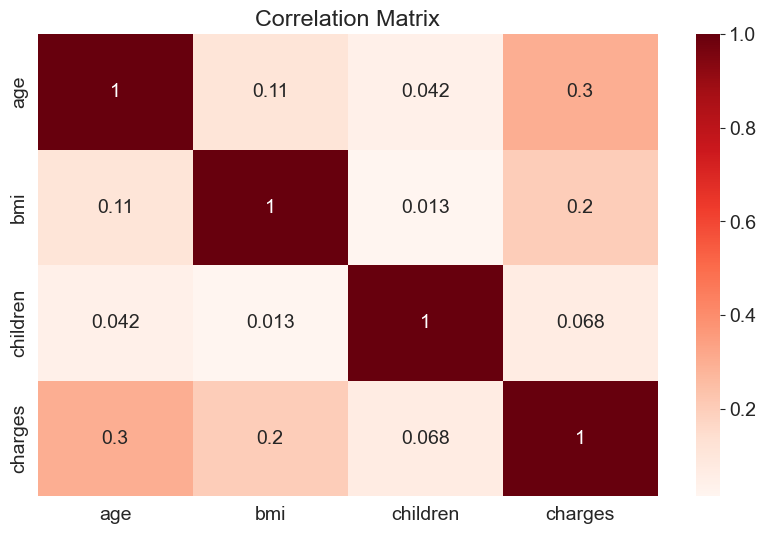

In [32]:
sns.heatmap(medical_df.select_dtypes(include='number').corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')

correlation cannot be interpret as cause-effect realtionship between features. => causation fallacy

LINEAR REGRESSION using a Single Feature
   - 'charges' using 'age' for non-smokers

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

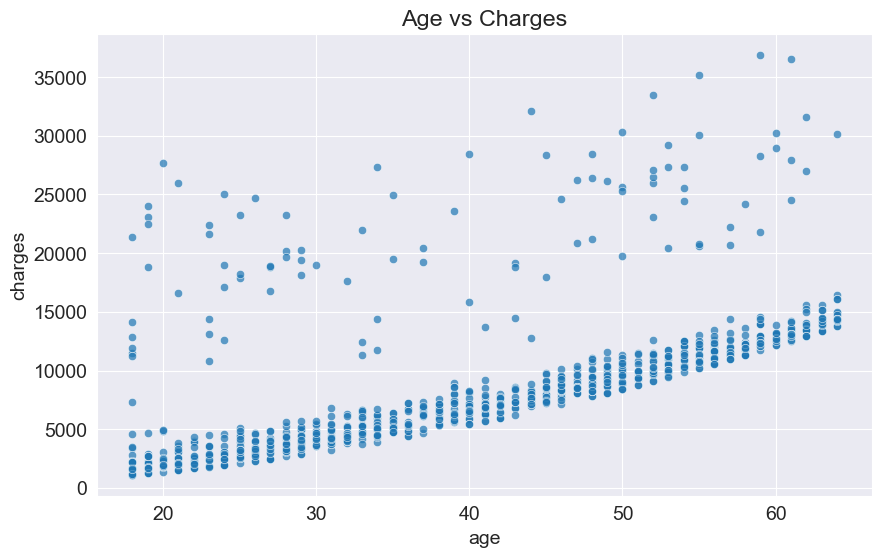

In [46]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

plt.title("Age vs Charges")
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:
y = wx + b
The line is characterized two numbers: w (called "slope") and b (called "intercept").

### MODEL: 

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:
charges = w × age + b

We'll try determine w and b for the line that best fits the data.

- This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.
- The numbers w and b are called the parameters or weights of the model.
- The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets"

In [37]:
#helper function
def estimate_charges(age, w, b):
    return w * age + b

non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
#guessing the values of w and b
w = 50
b = 100

ages = non_smoker_df.age
target = non_smoker_df.charges

estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Text(0, 0.5, 'Charges')

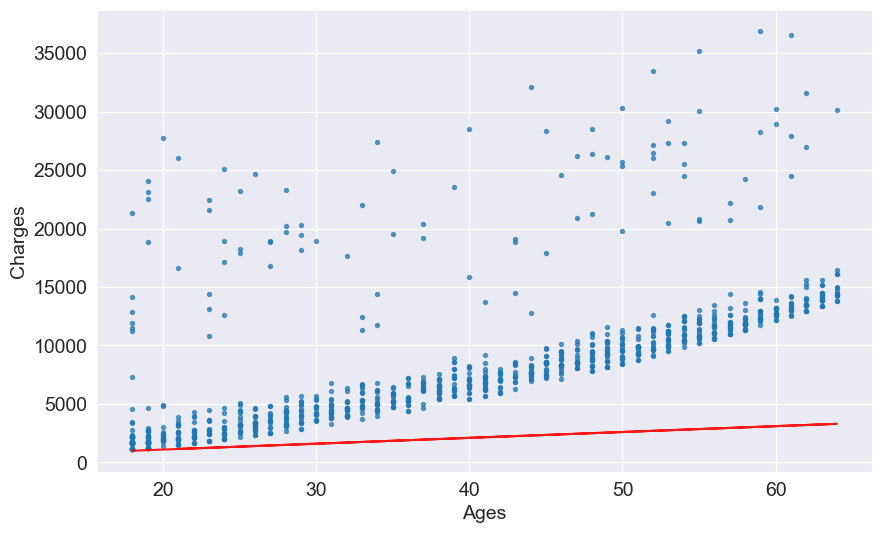

In [49]:
#plotting

plt.plot(ages, estimated_charges, c='red', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.7)
plt.xlabel('Ages')
plt.ylabel('Charges')

In [50]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.plot(ages,estimated_charges,c='red',alpha=0.9)
    plt.scatter(ages, target,alpha=0.7)
    plt.xlabel("Ages")
    plt.ylabel("Charges")
    plt.legend(['Estimate','Actual'])

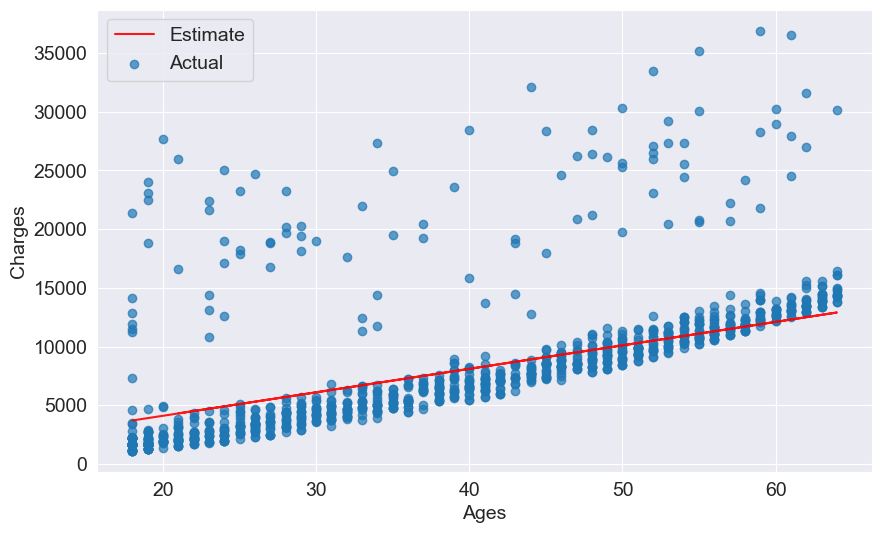

In [57]:
try_parameters(200,100)

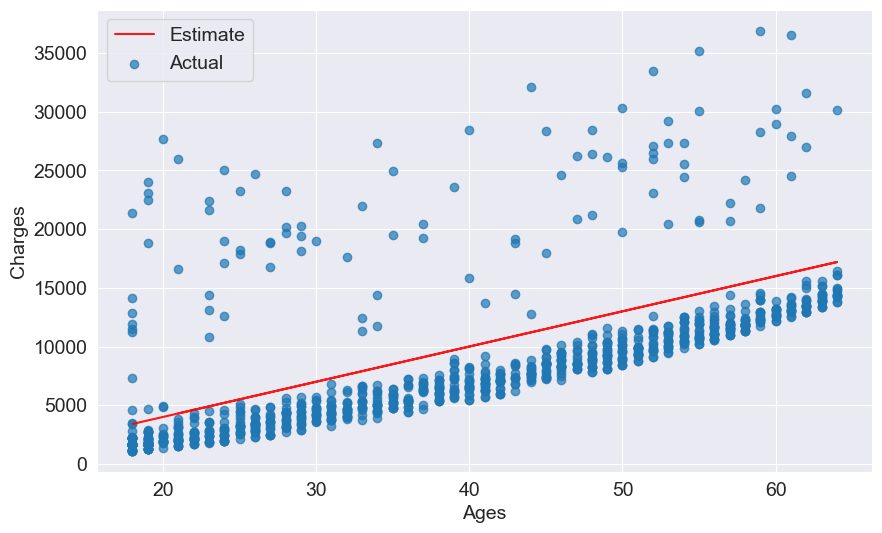

In [56]:
try_parameters(300,-2000)

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [81]:
%pip install numpy --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Meet Brijwani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [82]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [83]:
w = 50
b = 100

predictions = estimate_charges(ages, w, b)
rmse(target,predictions)

8461.949562575493

#### Optimizer
Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data
1. Ordinary Least Squares(better for smaller datasets)
2. Stochastic gradient descent (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

### Linear Regression using Scikit-learn

In [ ]:
%pip install scikit-learn --quiet

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()



(1064,)

In [71]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

inputs.shape # inputs have to be 2D, so a dataframe instead of a single column

(1064, 1)

In [73]:
model.fit(inputs,targets)

LinearRegression()

In [77]:
test = np.array([[20],[30],[61]])
test.shape

(3, 1)

In [79]:
model.predict(test)

C:\Users\Meet Brijwani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 3253.55770006,  5926.04682837, 14210.76312614])

In [80]:
predictions = model.predict(inputs)
rmse(targets,predictions)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the coef_ and intercept_ properties.

w = [267.24891283]
b = -2091.4205565650864


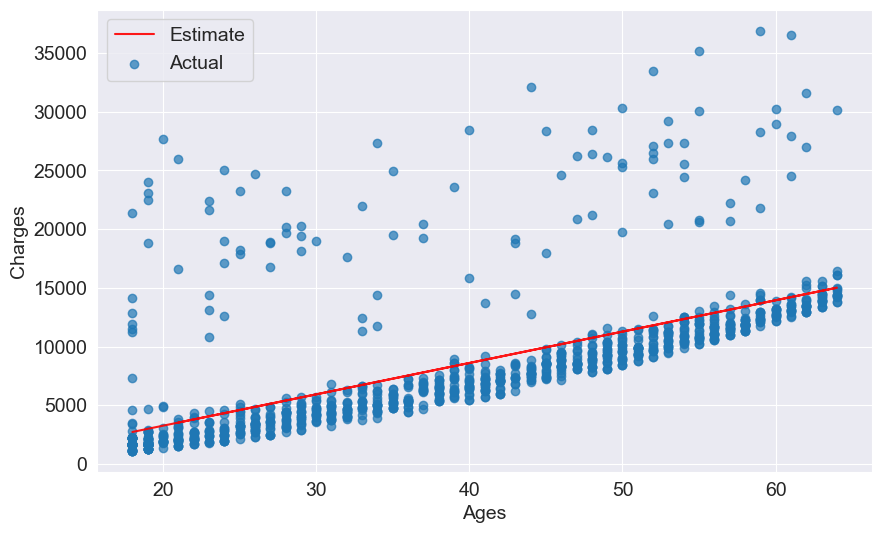

In [87]:
try_parameters(model.coef_,model.intercept_)
print('w =', model.coef_)
print('b =', model.intercept_)